# Twitter Data Sentimental Analysis Using Naive Bayes Classifier

# Name: Sourav Khot
PRN NO.: 22070243027

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("C:\Datasets/Twitter_Data.csv")

In [3]:
data

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [4]:
df=data.copy()

In [5]:
print(df.shape)
print(df.size)

(162980, 2)
325960


In [6]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [12]:
import re
# Clean HTML tags present in dataset or Remove punctuation
def strip_tags(text):         
    pattern = re.compile('<.*?>')   
    result = re.sub(pattern,'', str(text))
    return result  

In [13]:
def to_lower(str):                         #Converted text to lowercase
    return str.lower()

In [15]:
#apply clean html
df["clean_text"] = df["clean_text"].apply(strip_tags)
df["clean_text"]

0         when modi promised “minimum government maximum...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these 456 crores paid neerav modi not reco...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162980, dtype: object

In [16]:
# Keep only Alphabetiic characters in dataset by using ascii tables in HEX
def clean_data(text):     
    result = re.sub('([^\x61-\x7A ])+', '', text)
    return result  

In [18]:
df["clean_text"] = df["clean_text"].apply(clean_data)
df["clean_text"]

0         when modi promised minimum government maximum ...
1         talk all the nonsense and continue all the dra...
2         what did just say vote for modi  welcome bjp t...
3         asking his supporters prefix chowkidar their n...
4         answer who among these the most powerful world...
                                ...                        
162975    why these  crores paid neerav modi not recover...
162976    dear rss terrorist payal gawar what about modi...
162977    did you cover her interaction forum where she ...
162978    there big project came into india modi dream p...
162979    have you ever listen about like gurukul where ...
Name: clean_text, Length: 162980, dtype: object

In [19]:
import nltk
from nltk.corpus import stopwords

In [22]:
#split the sentence and check if stopwords present in it, if not stop word then append it to another temp list till. 
#And clear the temp list after use
def remove_stopwords(text):
    temp = []
    for i in text.split():        
        if i not in stopwords.words('english'):
            temp.append(i)            
    result = temp[:]
    temp.clear()
    return result

In [24]:
df["clean_text"] = df["clean_text"].apply(remove_stopwords)

In [25]:
df.head()

,clean_text,category
0,"[modi, promised, minimum, government, maximum,...",-1.0
1,"[talk, nonsense, continue, drama, vote, modi]",0.0
2,"[say, vote, modi, welcome, bjp, told, rahul, m...",1.0
3,"[asking, supporters, prefix, chowkidar, names,...",1.0
4,"[answer, among, powerful, world, leader, today...",1.0


In [26]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
ps = PorterStemmer()

In [27]:
def stem_words(text):
    temp = []
    for i in text:
        temp.append(ps.stem(i))       
    result = temp[:]
    temp.clear()
    return result

In [28]:
df["clean_text"] = df["clean_text"].apply(stem_words)

In [29]:
df.head()

,clean_text,category
0,"[modi, promis, minimum, govern, maximum, gover...",-1.0
1,"[talk, nonsens, continu, drama, vote, modi]",0.0
2,"[say, vote, modi, welcom, bjp, told, rahul, ma...",1.0
3,"[ask, support, prefix, chowkidar, name, modi, ...",1.0
4,"[answer, among, power, world, leader, today, t...",1.0


In [30]:
#Now again join words present into list to the sentence
def list_to_sentence(wl):
    return " ".join(wl)

In [31]:
#apply stem function
df["clean_text"] = df["clean_text"].apply(list_to_sentence)

In [32]:
df.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1.0
1,talk nonsens continu drama vote modi,0.0
2,say vote modi welcom bjp told rahul main campa...,1.0
3,ask support prefix chowkidar name modi great s...,1.0
4,answer among power world leader today trump pu...,1.0


In [33]:
#convert all data into columns in such a way that
#words will be the column and row will be the frequency of that word
#and last column will be the category
#for this import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=500)#most used 500 words

In [34]:
X = cv.fit_transform(df['clean_text']).toarray()

In [35]:
X.shape

(162980, 500)

In [36]:
df.iloc[:,-1]

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64

In [37]:
df["category"]

0        -1.0
1         0.0
2         1.0
3         1.0
4         1.0
         ... 
162975   -1.0
162976   -1.0
162977    0.0
162978    0.0
162979    1.0
Name: category, Length: 162980, dtype: float64

In [38]:
df["category"].isna().sum()

7

In [39]:
df.isnull().sum()

clean_text    0
category      7
dtype: int64

In [40]:
df["category"].isna().sum()

7

In [41]:
df["category"] = df["category"].replace(np.nan, 0)

In [42]:
df["category"].isna().sum()

0

In [43]:
#convert to integer
def float_to_int(a):
    return int(a)

In [44]:
df["category"] = df["category"].apply(float_to_int)

In [45]:
df["category"]

0        -1
1         0
2         1
3         1
4         1
         ..
162975   -1
162976   -1
162977    0
162978    0
162979    1
Name: category, Length: 162980, dtype: int64

In [47]:
y=df.iloc[:,-1].values

In [48]:
y.shape

(162980,)

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(y_test.shape)

(130384, 500)
(130384,)
(32596,)


In [52]:
#import Naive bases major classes to check the accuracy
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

In [53]:
#Create object of each class
gObj = GaussianNB()
mObj = MultinomialNB()
bObj = BernoulliNB()

In [56]:
#Pass the data set to train
print(gObj.fit(X_train, y_train))
print(mObj.fit(X_train, y_train))
bObj.fit(X_train, y_train)

GaussianNB()
MultinomialNB()


BernoulliNB()

In [57]:
#Pass the data set to train
gObj.fit(X_train, y_train)
mObj.fit(X_train, y_train)
bObj.fit(X_train, y_train)

BernoulliNB()

In [58]:
#Create predict: The predict obj sshape should be same as test obj shape
y_pred_gauss = gObj.predict(X_test)
y_pred_gauss.shape

(32596,)

In [59]:
y_pred_multinom = mObj.predict(X_test)
y_pred_multinom.shape

(32596,)

In [60]:
y_pred_berno = bObj.predict(X_test)
y_pred_berno.shape

(32596,)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [72]:
#accuracy score for Gaussian
print("Gaussian: ", accuracy_score(y_test,y_pred_gauss)*100,"%")

Gaussian:  68.36421646827831 %


Testing Accuracy :  68.36421646827831 %
[[3667 2423 1011]
 [ 702 9967  355]
 [2431 3390 8650]]


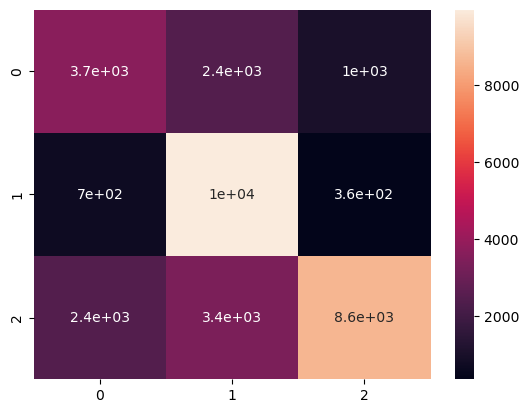

              precision    recall  f1-score   support

          -1       0.54      0.52      0.53      7101
           0       0.63      0.90      0.74     11024
           1       0.86      0.60      0.71     14471

    accuracy                           0.68     32596
   macro avg       0.68      0.67      0.66     32596
weighted avg       0.71      0.68      0.68     32596



In [79]:
print("Testing Accuracy : ",accuracy_score(y_test,y_pred_gauss)*100,"%")
y_pred_gauss
cm=confusion_matrix(y_true=y_test,y_pred=y_pred_gauss)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred_gauss))

In [73]:
#accuracy score for Multinomial
print("Multinomial: ", accuracy_score(y_test,y_pred_multinom)*100,"%")

Multinomial:  67.77518713952632 %


Testing Accuracy :  67.77518713952632 %
[[ 3275  1962  1864]
 [  649  8253  2122]
 [ 1305  2602 10564]]


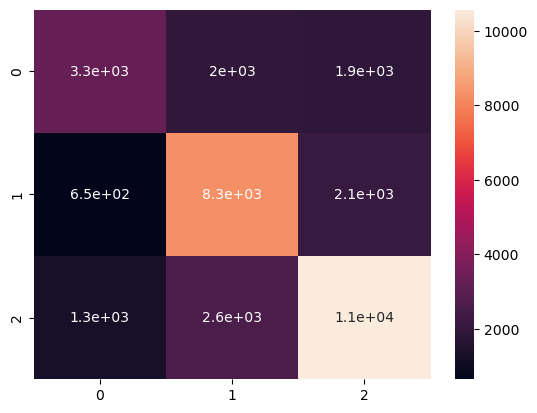

              precision    recall  f1-score   support

          -1       0.63      0.46      0.53      7101
           0       0.64      0.75      0.69     11024
           1       0.73      0.73      0.73     14471

    accuracy                           0.68     32596
   macro avg       0.67      0.65      0.65     32596
weighted avg       0.68      0.68      0.67     32596



In [80]:
print("Testing Accuracy : ",accuracy_score(y_test,y_pred_multinom)*100,"%")
y_pred_multinom
cm=confusion_matrix(y_true=y_test,y_pred=y_pred_multinom)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred_multinom))

In [74]:
#accuracy score for BernoulliNB
print("BernoulliNB: ", accuracy_score(y_test,y_pred_berno)*100,"%")

BernoulliNB:  69.88280770646705 %


Testing Accuracy :  69.88280770646705 %
[[ 3351  1797  1953]
 [  868  8887  1269]
 [ 1474  2456 10541]]


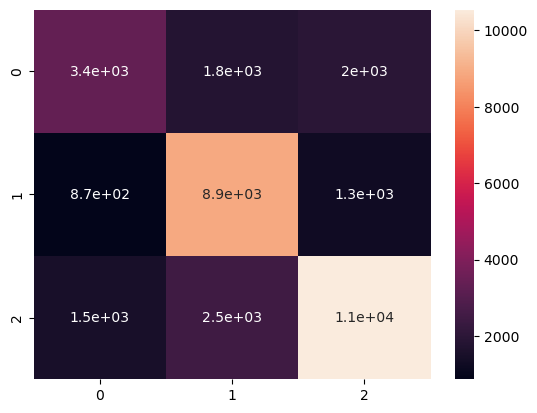

              precision    recall  f1-score   support

          -1       0.59      0.47      0.52      7101
           0       0.68      0.81      0.74     11024
           1       0.77      0.73      0.75     14471

    accuracy                           0.70     32596
   macro avg       0.68      0.67      0.67     32596
weighted avg       0.70      0.70      0.69     32596



In [81]:
print("Testing Accuracy : ",accuracy_score(y_test,y_pred_berno)*100,"%")
y_pred_berno
cm=confusion_matrix(y_true=y_test,y_pred=y_pred_berno)
print(cm)
sns.heatmap(cm,annot=True)
plt.show()
print(classification_report(y_test,y_pred_berno))

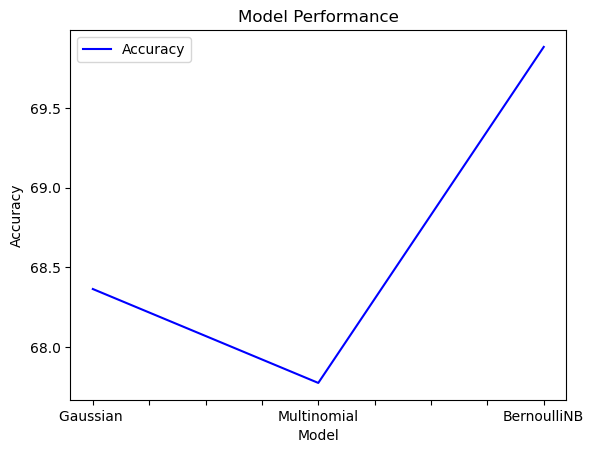

In [71]:
# Define the performance metrics for three models
performance = {'Gaussian ': 68.36421646827831 , 'Multinomial': 67.77518713952632  , 'BernoulliNB':69.88280770646705} 

# Create a pandas dataframe from the performance metrics
df = pd.DataFrame.from_dict(performance, orient='index', columns=['Accuracy'])

# Plot the accuracy of the three models using a line plot
ax = df.plot(kind='line', title='Model Performance', xlabel='Model', ylabel='Accuracy', color='Blue')

# Display the plot
plt.show()

In [65]:
#Crosschek - Output for positive
data = {
  "text": ["Discussion was very good"]
}    
dfx = pd.DataFrame(data)
Xcheck = cv.transform(dfx['text']).toarray()
print(bObj.predict(Xcheck)[0])
print(mObj.predict(Xcheck)[0])
print(gObj.predict(Xcheck)[0])

1
1
1


In [66]:
#Crosschek - Output for Negative text
#Result : it works
data = {
  "text": ["No one should check this. Worst experience. Harmful to childrens"]
}    
dfx = pd.DataFrame(data)
Xcheck = cv.transform(dfx['text']).toarray()
print(bObj.predict(Xcheck)[0])
print(mObj.predict(Xcheck)[0])
print(gObj.predict(Xcheck)[0])

0
0
0


In [67]:
#Crosschek - Output for Negative text
#Result : it works
data = {
  "text": ["The analysis is bad"]
}    
dfx = pd.DataFrame(data)
Xcheck = cv.transform(dfx['text']).toarray()
print(bObj.predict(Xcheck)[0])
print(mObj.predict(Xcheck)[0])
print(gObj.predict(Xcheck)[0])

-1
-1
-1


In [68]:
#Crosschek - Output for neutral
#Result : Multinomial fails
data = {
  "text": ["we are coming"]
}    
dfx = pd.DataFrame(data)
Xcheck = cv.transform(dfx['text']).toarray()
print(bObj.predict(Xcheck)[0])
print(mObj.predict(Xcheck)[0])
print(gObj.predict(Xcheck)[0])

0
1
0


In [69]:
#Crosschek - Output for neutral
#Result : None worked
data = {
  "text": ["The analysis is not bad nor good"]
}    
dfx = pd.DataFrame(data)
Xcheck = cv.transform(dfx['text']).toarray()
print(bObj.predict(Xcheck)[0])
print(mObj.predict(Xcheck)[0])
print(gObj.predict(Xcheck)[0])

1
1
-1
